In [8]:
import numpy as np
import pandas as pd
import math
import nltk
from nltk.corpus import stopwords


In [9]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaibhavgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
df = pd.read_csv('/Users/vaibhavgupta/gatom/gatom-ml/data/temp_csv_directory/spam.csv', encoding='latin-1')

In [14]:
df.head()

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [15]:
df.shape

(5572, 2)

In [16]:
df.describe()

,text,label
count,5572,5572
unique,5169,2
top,"Sorry, I'll call later",ham
freq,30,4825


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
text     5572 non-null object
label    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [18]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [19]:
df['length'] = df['text'].apply(len)

In [20]:
df

,text,label,length
0,"Go until jurong point, crazy.. Available only ...",ham,111
1,Ok lar... Joking wif u oni...,ham,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155
3,U dun say so early hor... U c already then say...,ham,49
4,"Nah I don't think he goes to usf, he lives aro...",ham,61
5,FreeMsg Hey there darling it's been 3 week's n...,spam,148
6,Even my brother is not like to speak with me. ...,ham,77
7,As per your request 'Melle Melle (Oru Minnamin...,ham,160
8,WINNER!! As a valued network customer you have...,spam,158
9,Had your mobile 11 months or more? U R entitle...,spam,154


In [21]:
df['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [22]:
df[df['length'] == 910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

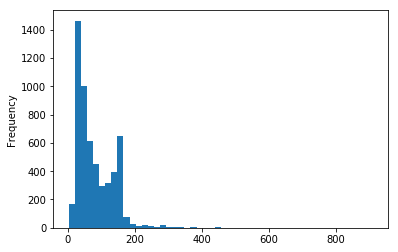

In [24]:
df['length'].plot(bins=50,kind = 'hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x129aa8320>,
      dtype=object)

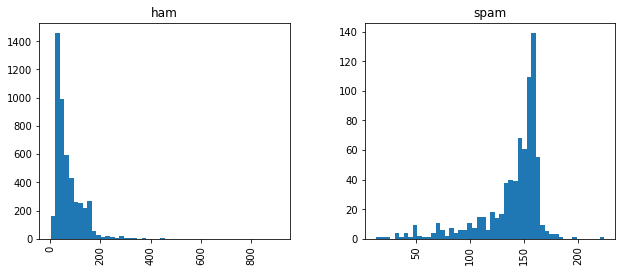

In [26]:
df.hist(column='length',by ='label',bins=50,figsize = (10,4))

In [27]:
import string

In [28]:
mess = 'Sample message ! Notice: it has punctuation'

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
nopunc = [char for char in mess if char not in string.punctuation]
nopunc = ''.join(nopunc)

In [34]:
nopunc

'Sample message  Notice it has punctuation'

In [35]:
from nltk.corpus import stopwords

In [36]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [37]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [38]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [39]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [40]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [41]:
df.head()

,text,label,length
0,"Go until jurong point, crazy.. Available only ...",ham,111
1,Ok lar... Joking wif u oni...,ham,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155
3,U dun say so early hor... U c already then say...,ham,49
4,"Nah I don't think he goes to usf, he lives aro...",ham,61


In [42]:
df['text'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
bow_transformer = CountVectorizer(analyzer=text_process)

In [45]:
bow_transformer.fit(df['text'])

CountVectorizer(analyzer=<function text_process at 0x129971510>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [47]:
message4 = df['text'][3]
message4

'U dun say so early hor... U c already then say...'

In [48]:
bow4 = bow_transformer.transform([message4])

In [49]:
bow4

<1x11304 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [50]:
print (bow_transformer.get_feature_names()[4073])

VALUED


In [52]:
print (bow_transformer.get_feature_names()[4068])

Usually


In [53]:
print (bow_transformer.get_feature_names()[9554])


set


In [54]:
messages_bow = bow_transformer.transform(df['text'])

In [55]:
print ('Shape of Sparse Matrix: ', messages_bow.shape)
print ('Amount of Non-Zero occurences: ', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz /
                             (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11304)
Amount of Non-Zero occurences:  50193
sparsity: 0.08%


In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [57]:
tfidf4 = tfidf_transformer.transform(bow4)

In [58]:
print (tfidf4)

  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


In [59]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.288863056423095
8.527076498901426


In [60]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [61]:
print (messages_tfidf.shape)

(5572, 11304)


In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,df['label'])

In [64]:
print ('Predicted: ',spam_detect_model.predict(tfidf4)[0] )
print ('Expected: ',df['label'][3])

Predicted:  ham
Expected:  ham


In [65]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print (all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [66]:
from sklearn.metrics import classification_report
print (classification_report(df['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

   micro avg       0.98      0.98      0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [69]:
from sklearn.model_selection import train_test_split


In [72]:
msg_train, msg_test, label_train, label_test = \
train_test_split(df['text'], df['label'], test_size=0.2)

print (len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [73]:
from sklearn.pipeline import Pipeline

In [74]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer =text_process)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',MultinomialNB())])

In [75]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x129971510>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [76]:
predictions = pipeline.predict(msg_test)

In [77]:
print (classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1016
        spam       0.72      1.00      0.84        99

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.98      0.97      0.97      1115



In [78]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [79]:
comment_words = ' '
stopwords = set(STOPWORDS) 

In [80]:
for val in df.text: 
      

    val = str(val) 
  
    tokens = val.split() 
      
#    for i in range(len(tokens)): 
#        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = None, 
                min_font_size = 10).generate(comment_words) 

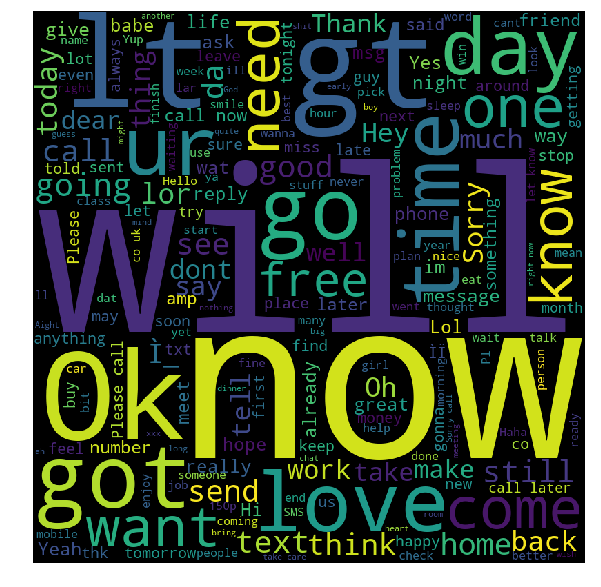

In [81]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 